# False neighbors and Recurrence plot

If you have not seen the notebook on attractor reconstruction, be sure to start from there. 

Let us suppose we reconstructed the heart attractor in 2 dimensions. Then we got a figure like the following:
INSERT FIGURE

How do you know that two points that lie near in phase space are actually true neighbors in this mathematical space? In other words, what if they are **false neighbors**? To solve this problem, you go up a dimension, that is in this example, 3 dimensions.
INSERT FIGURE

Now, consider the distance between two points in the 2D representation, if these points lie "farther away" in the 3D representation, then they were false neighbors. We can formalize this idea by taking the norm between the points in 3D, if this norm is greater than a certain $r$ value, then these two points were false neighbors. 


Disclaimer: the example was set in 2 and 3 dimensions for the sake of visual representations.


Now we want to link this with recurrence plots. For constructing a recurrence plot, you must know beforehand the dimension of the attractor. Then, you consider an $\epsilon$-neighborhood around a point of the attractor. Every point that lies on the $\epsilon$-neighborhood of our point will be assigned a value of 1. And every point that lies outside the $\epsilon$-neighborhood of our point will be assigned a value of 0. For a visual representation, see the following figure.

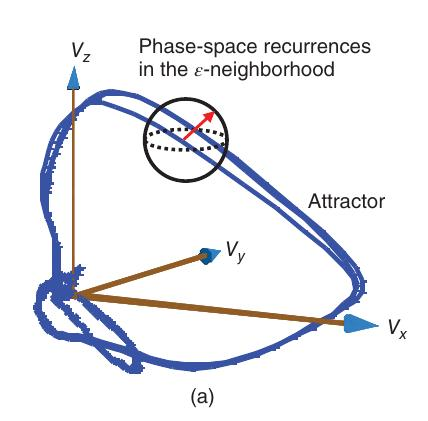


With this technique, interesting patterns emerge with certain kinds of signals. For example see the following figure where the time series is plotted on the top row and in the bottom the recurrence plots. From left to right: uncorrelated stochastic data (white noise), harmonic oscillation with two frequencies, chaotic data with linear trend (logistic map) and data from an auto-regressive process.

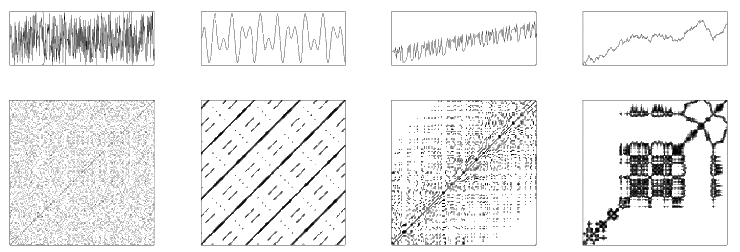

Image taken from Norbert Marwan, Pucicu at English Wikipedia, CC BY-SA 3.0, 10 October 2006, https://upload.wikimedia.org/wikipedia/commons/4/46/Rp_examples740.gif


The big drawback here is that we are not sure of the true dimensionality of the attractor. Besides, when reconstructing it, we are arbitrarily choosing the time lags and based on this is the attractor we obtain.

All this to say that some of the patterns obtained in the recurrence plot may be false neighbors due to the technique used for obtaining the attractor. Nevertheless, the technique will be clear with the following notebook.

# Setting up the notebook

We begin by setting up the Jupyter notebook and importing the Python modules needed for plotting figures, create animations, etc. We include commands to view plots in the Jupyter notebook, and to create figures with good resolution and large labels. These commands can be customized to produce figures with other specifications.

In [16]:
# Imports python libraries
import numpy as np
import random as rd
import wave
import sys
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
sys.path.insert(1, r'./../functions') # add to pythonpath

# commands to create high-resolution figures with large labels
%config InlineBackend.figure_formats = {'png', 'retina'} 
plt.rcParams['axes.labelsize'] = 16 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 18 # fontsize for figure titles
plt.rcParams['font.size'] = 14 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.4 # line width for plotting

## Extracting and graphing the data

ECG recordings were obtained using the Backyard Brains Heart and Brain Spiker Box. The recordings are saved as audio files in .wav format. The first thing we have to do is open the .wav files and extract the data. We can extract the number of recording channels, sampling rate, etc.

In [2]:
#Function that extracts the number of recording channels, sampling rate, time and signal
#variable is the path and filename of the .wav file
def ecg(variable):
    record = wave.open(variable, 'r') # load the data

    # Get the number of channels, sample rate, etc.
    numChannels = record.getnchannels() #number of channels
    numFrames = record.getnframes() #number of frames
    sampleRate = record.getframerate() #sampling rate
    sampleWidth = record.getsampwidth()
    
    # Get wave data
    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)

    # Get time window
    timeECG = np.linspace(0, len(waveData)/sampleRate, num=len(waveData))

    return timeECG, waveData

In [3]:
def detecta_maximos_locales(timeECG, waveData, threshold_ratio=0.7):
    # If not all the R peaks are detected, lower the threshold_ratio
    # If components that are not R peaks (like T waves) are detected, higher the threshold_ratio

    if len(timeECG) != len(waveData): #Raises an error if the two arrays have different lengths
        raise Exception("The two arrays have different lengths.")
    
    interval = max(waveData) - min(waveData)
    threshold = threshold_ratio*interval + min(waveData)
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False
    
    for i in range(0, len(waveData)):
            
        if waveData[i] >= threshold:#If a threshold value is surpassed,
            # the indices and values are saved 
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])
            
        elif banner == True and waveData[i] < threshold: #If the threshold value is crossed
            # the index of the maximum value in the original array is saved
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False     

    return mxs_indices

In [4]:
# If the input of this function is time, the intervals will be given in those same units
# Obtaining the indexes at which the R peaks occur.
def R_intervals(time_indices):
    length = len(time_indices)
    intervals = np.zeros(length-1)
    
    for i in range(0, length-1):
        intervals[i] = time_indices[i+1]-time_indices[i]
    
    return intervals

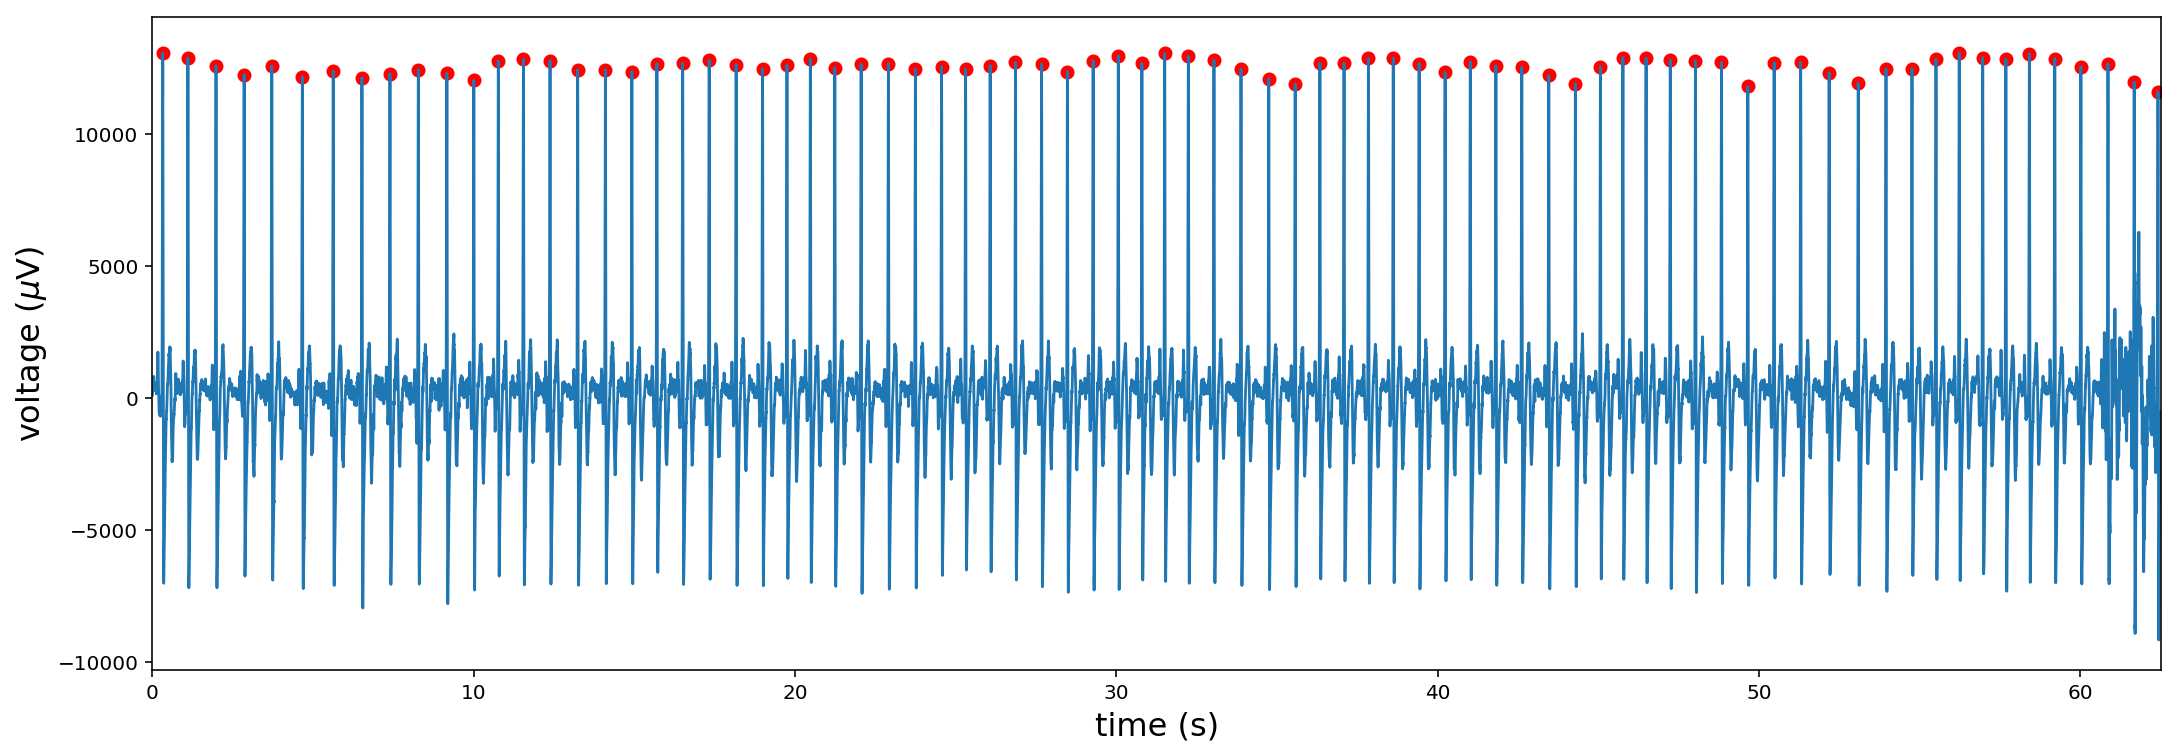

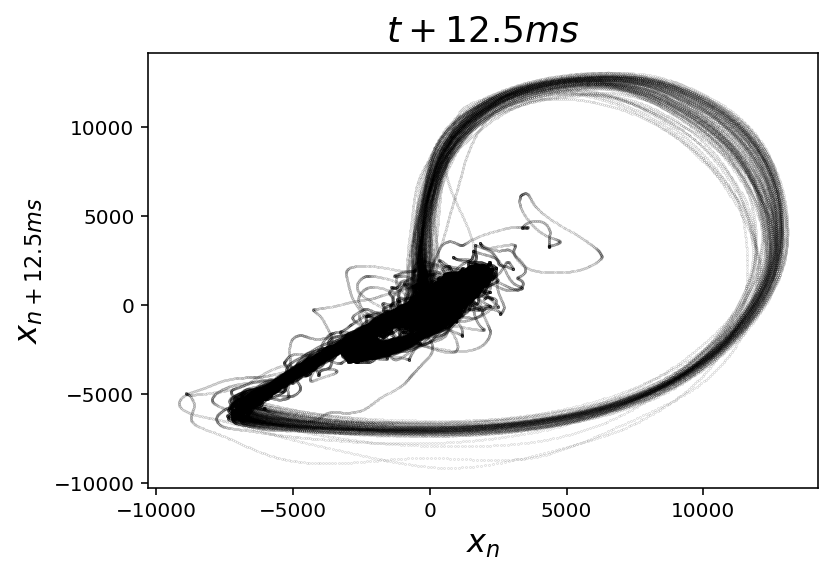

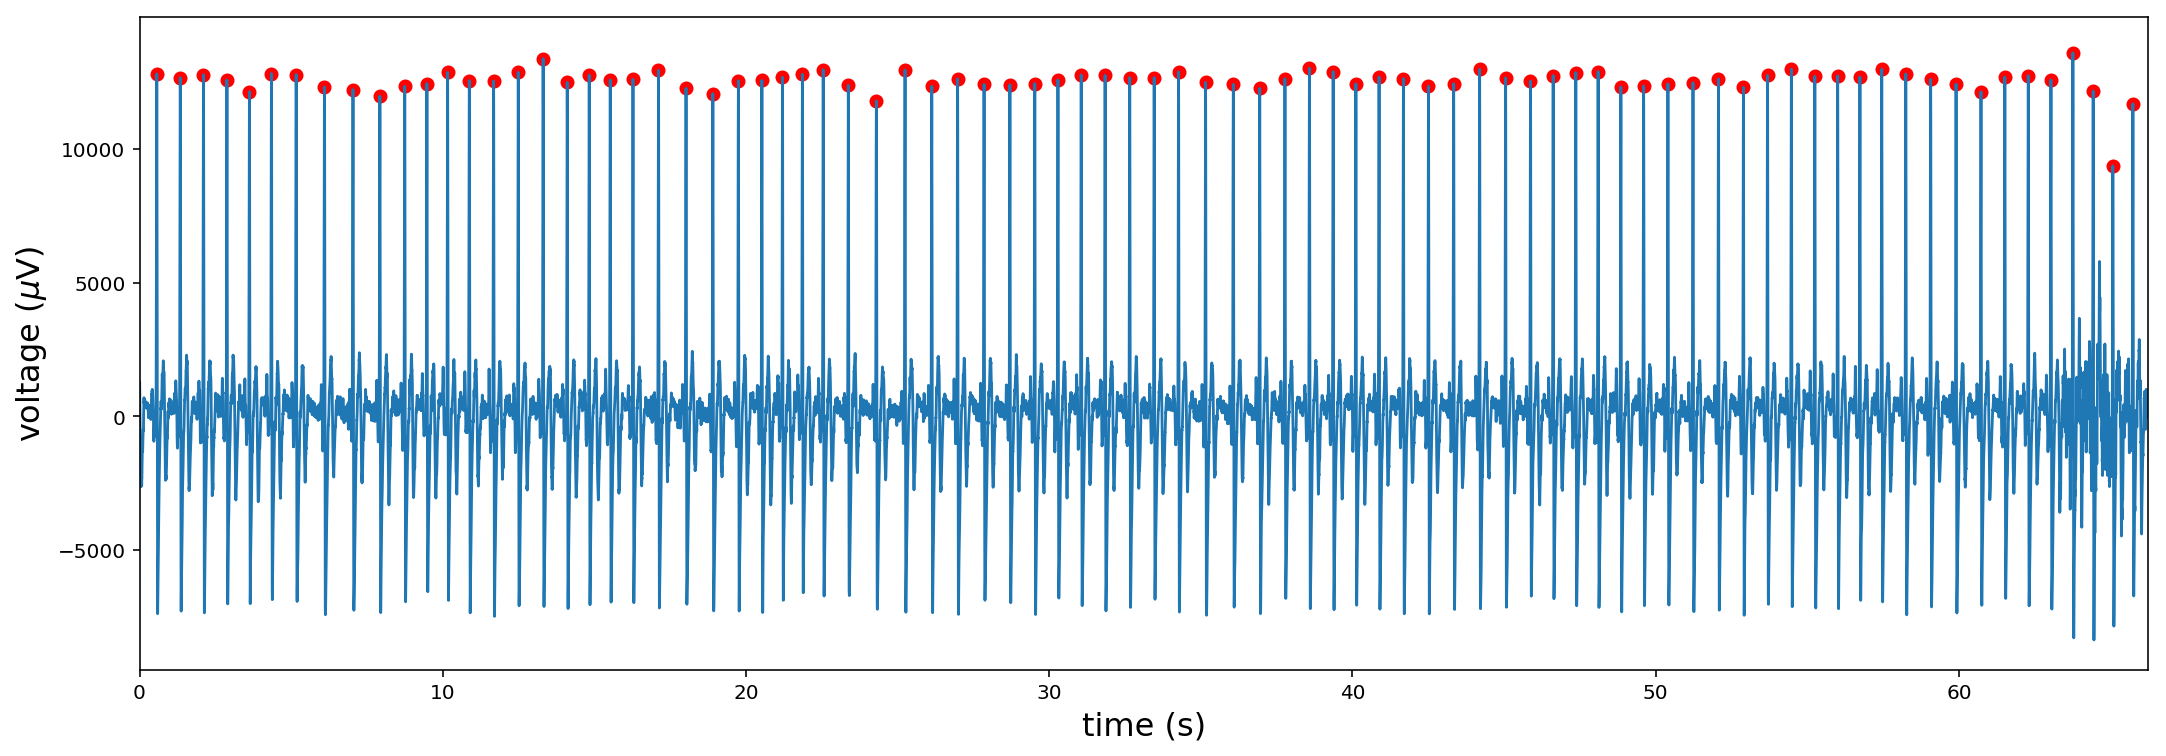

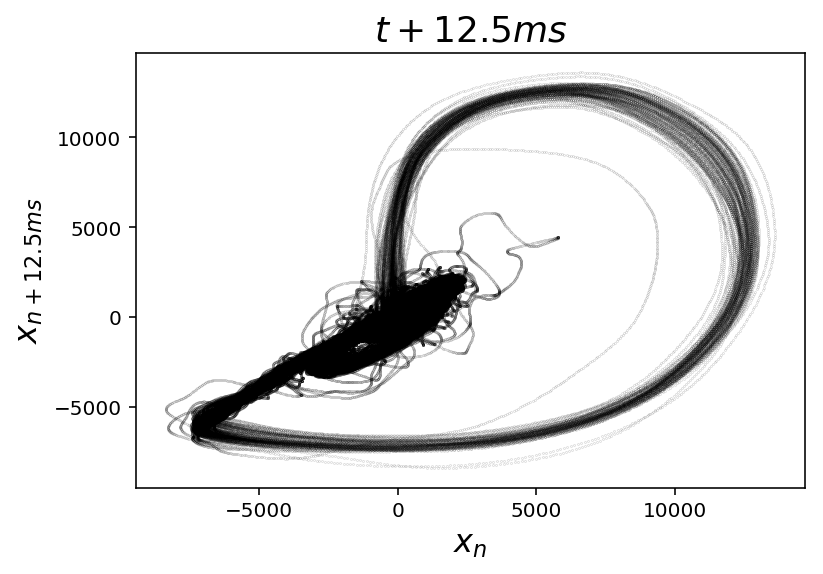

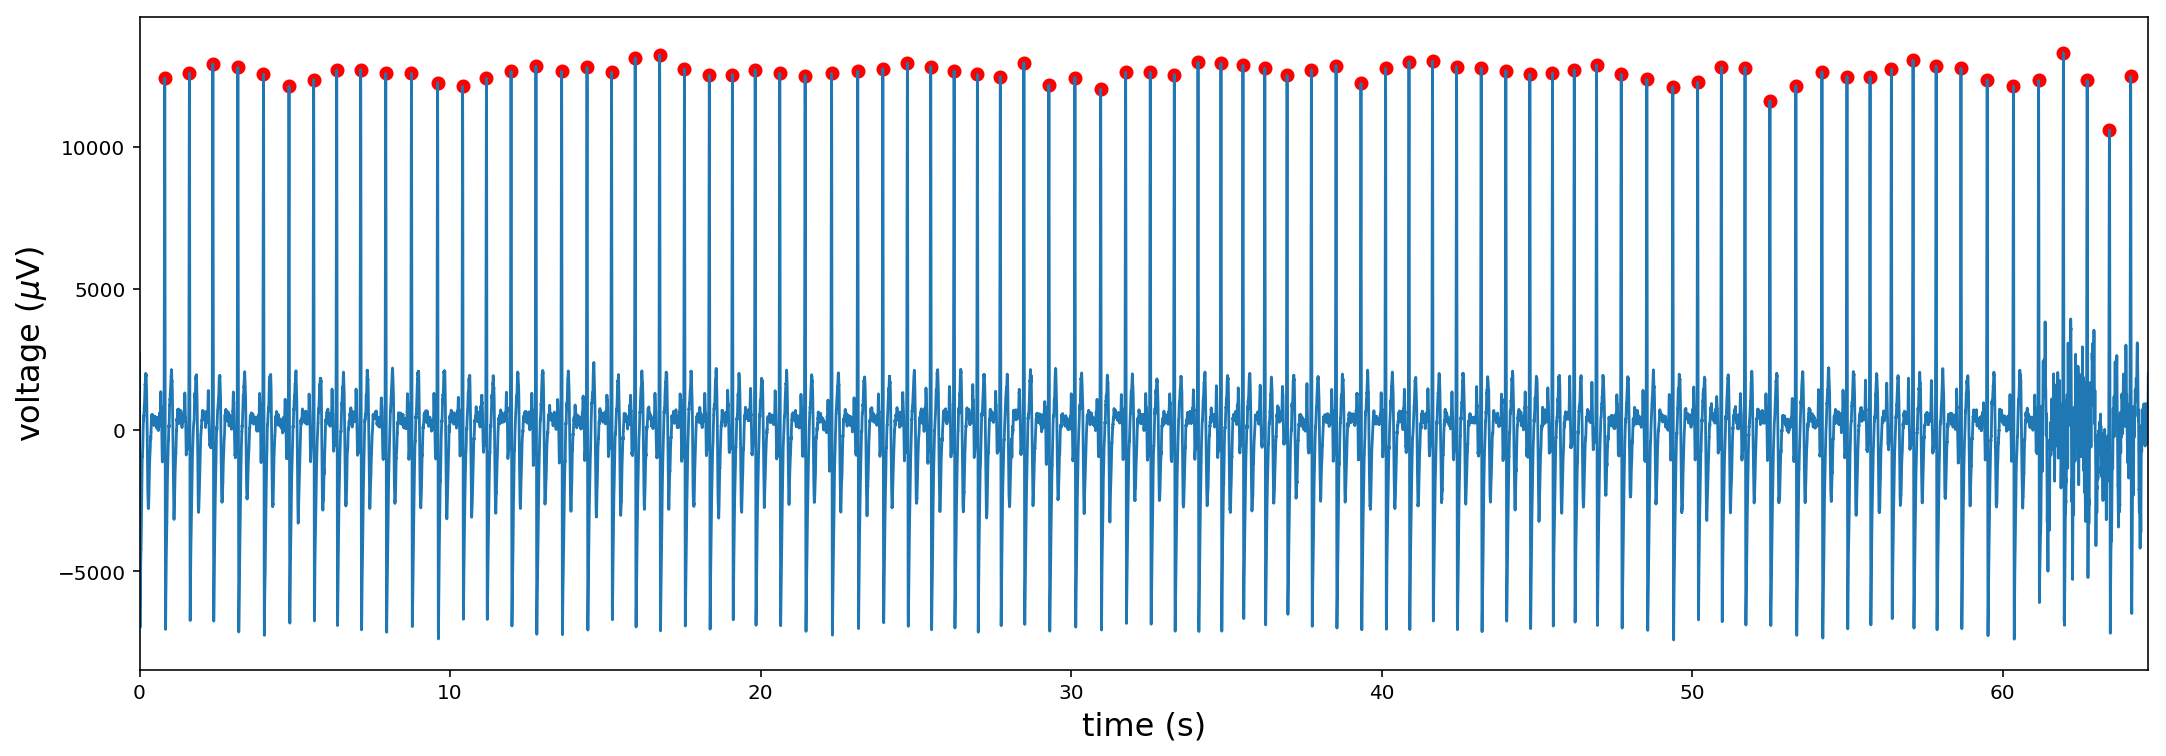

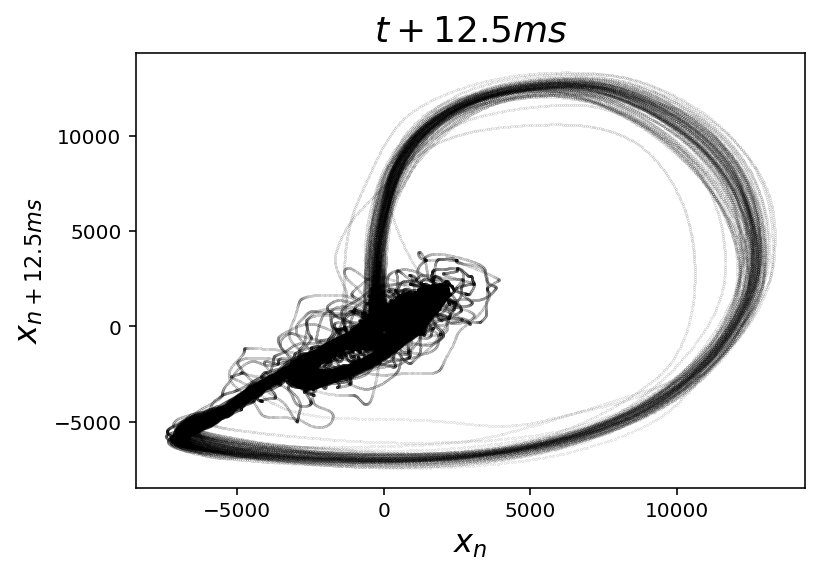

In [5]:
# InputPaths = ["ECG_registros_meditacion/1.- Control/"]

# TheList = os.listdir(InputPath)

# #Notice that the files you want to read must be in folders inside the folder where this notebook is
# for i in range(0, len(InputPaths)):

InputPath = "ECG_registros_meditacion/1.- Control/"

TheList = os.listdir(InputPath)

for TheFile in TheList:
    # break up the file name into pieces based on periods
    TheFileName, TheFileExtension = os.path.splitext(TheFile)

    # create the full path to the file
    InputFilePath=InputPath+TheFileName+TheFileExtension
    # determine if this is a file (name and extension), and the extension is "wav"
    if (TheFileExtension==".wav"):

        #Procesamiento que ya habiamos hecho
        timeECG,waveData = ecg(InputFilePath)

        #Detects R peaks
        mxs_indices = detecta_maximos_locales(timeECG, waveData)

        #Plots R peaks and ECG signal
        plt.figure(figsize=(18,6))
        plt.xlabel(r'time (s)')
        plt.ylabel(r'voltage ($\mu$V)')
        plt.xlim(min(timeECG),max(timeECG))
        plt.plot(timeECG, waveData)
        plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
        plt.show()

        #Plots the reconstructed phase space
        time_delays = [125, 250]
        time = time_delays[0]*0.1
        n = np.size(waveData)
        plt.plot(waveData[0: n-time_delays[0]], waveData[time_delays[0]: n],
                  marker = "o", markersize = 0.05, linewidth = 0.005, color = "black")
        plt.title(r"$t+"+str(time)+"ms$")
        plt.xlabel(r"$x_n$")
        y = r'$x_{n+'+str(time)+"ms}$"
        plt.ylabel(y)
        plt.show()

In [6]:
# Debido a la frecuencia de muestreo, hay demasiados puntos cercanos unos de otros.
# Queremos utilizar menos puntos, mas espaciados unos entre otros.

In [7]:
len(waveData) #10 000 datos en 1 segundo

number_points = 4000
surrogate = [waveData[i*5] for i in range(0, number_points)]
time_surrogate = [timeECG[i*5] for i in range(0, number_points)]

#Buscamos que los datos esten separados maximo 12.5 ms
print(time_surrogate[25]*1000) #Este es el delay que buscamos, 12.5 ms!

time_surrogate[len(time_surrogate)-1]*1000 # 2 segundos

12.500019324597584


1999.5030911626297

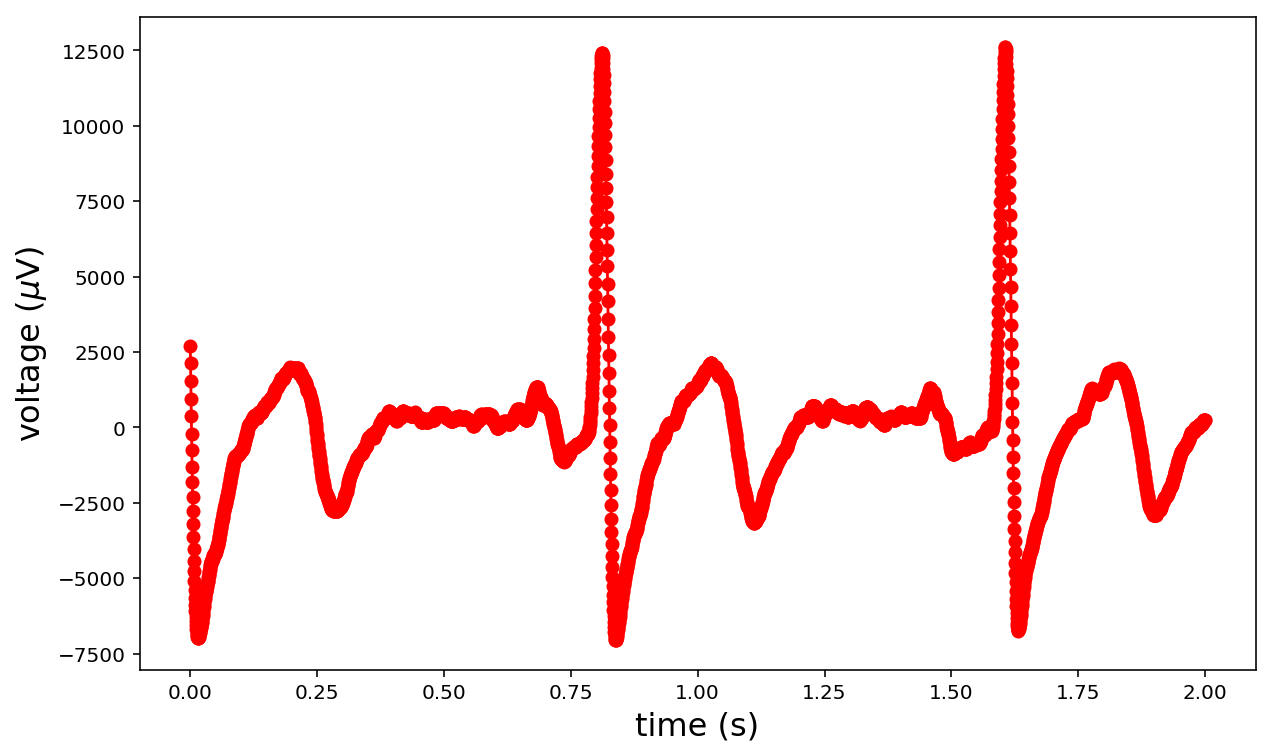

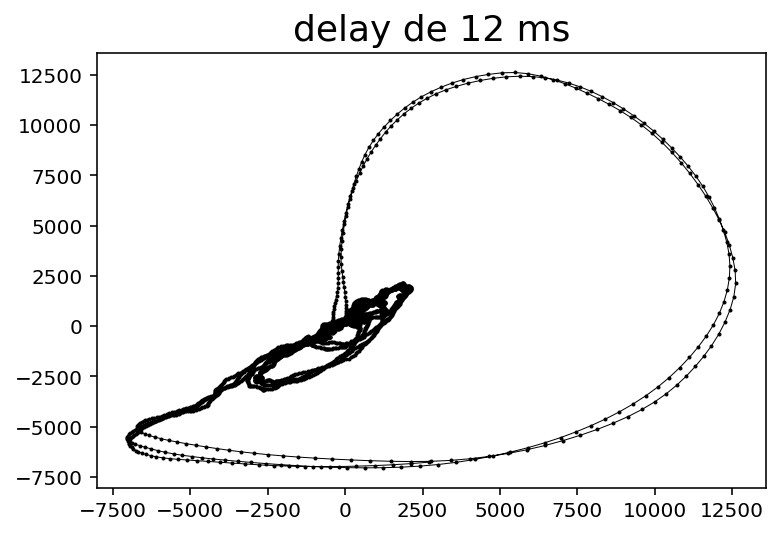

In [8]:
#Plots R peaks and ECG signal
plt.figure(figsize=(10,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
# plt.xlim(min(timeECG),max(timeECG))
# plt.plot(timeECG, waveData)
plt.plot(time_surrogate, surrogate, marker="o", c="r")
plt.show()

#Plots the reconstructed phase space
# time_delays = [125, 250]
# time = time_delays[0]*0.1
delay = 25

n = np.size(surrogate)
plt.plot(surrogate[0: n-delay], surrogate[delay: n],
          marker = "o", markersize = 1, linewidth = 0.5, color = "black")
plt.title("delay de 12 ms")
plt.show()

In [9]:
# Binary Recurrence plot
epsilon = 800
delay = 25
n = len(surrogate)
bin_mat = np.zeros((n,n), dtype = 'bool')

for i in range(0, n-delay):
    for j in range(delay, n):
        if np.sqrt(np.abs(surrogate[i]**2 - surrogate[j]**2)) < epsilon:
            #euclidian norm less than epsilon, or the Heaviside function
            bin_mat[i][j] = True


In [10]:
index_surrogate = [i for i in range(0, len(surrogate))]

/home/daniela/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


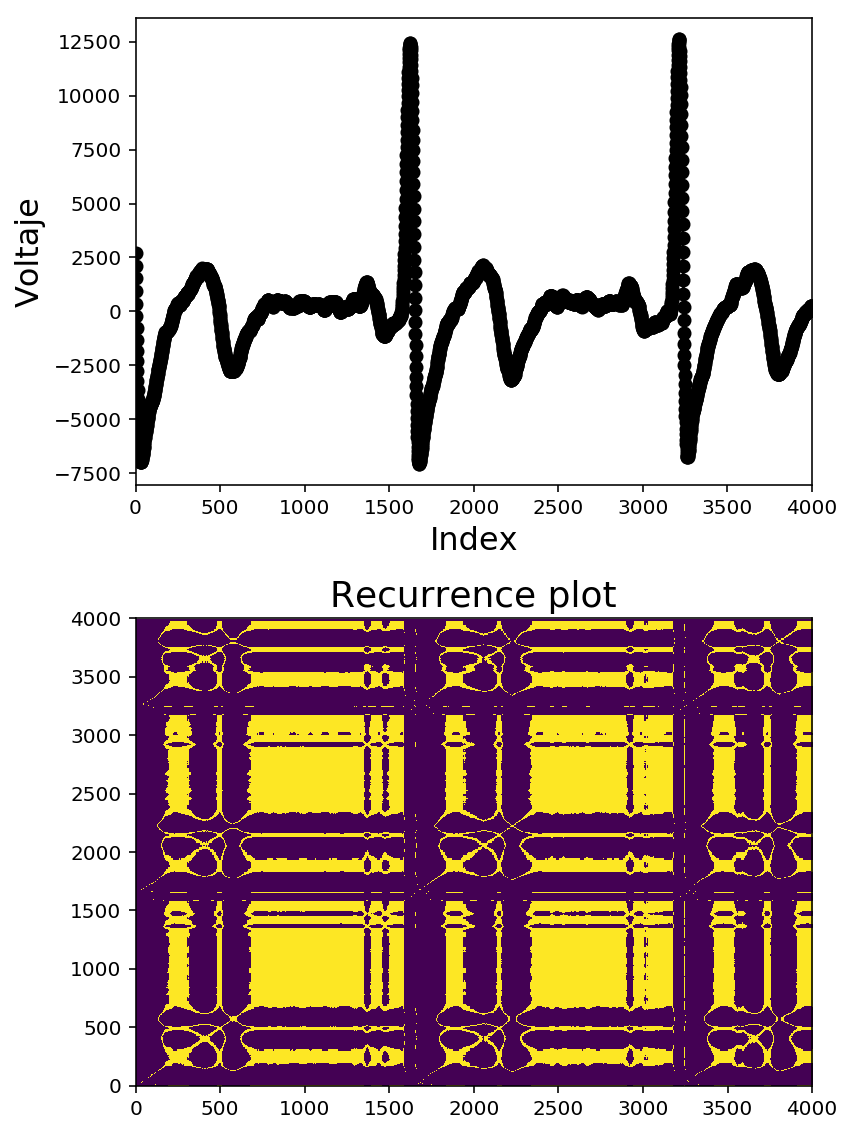

In [11]:
#Initializing the graphic space
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# Electrocardiogram
ax1.set_ylabel('Voltaje')
ax1.set_xlabel('Index')
ax1.set_xlim(0, len(surrogate))
ax1.plot(index_surrogate, surrogate, marker="o", c="k") #index_surrogate or time_surrogate (ms)
# ax1.plot(surrogate[0: n-delay], surrogate[delay: n],
#           marker = "o", markersize = 0.05, linewidth = 0.005, color = "black")

#Diagrama de recurrencia
ax2.set_title("Recurrence plot")
ax2.imshow(bin_mat, origin='lower', aspect="auto")
fig.tight_layout()
fig.show()

/home/daniela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


0
1000
2000
3000


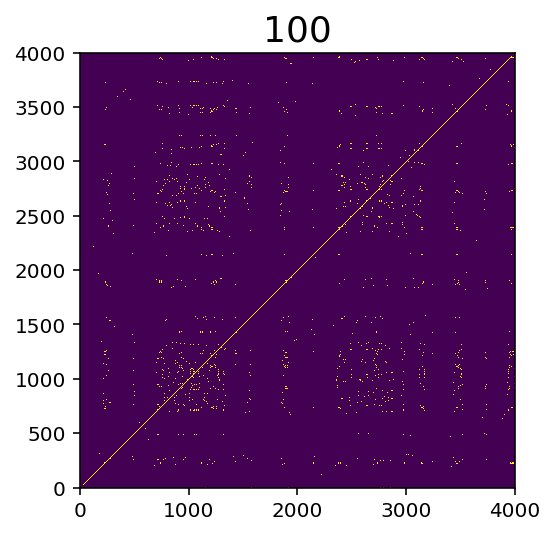

0
1000
2000
3000


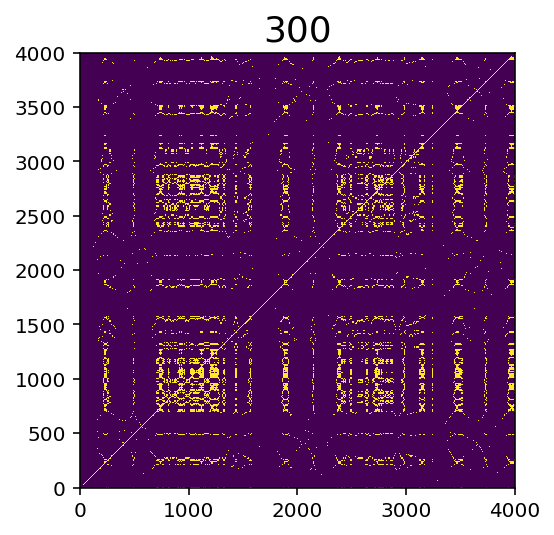

0
1000
2000
3000


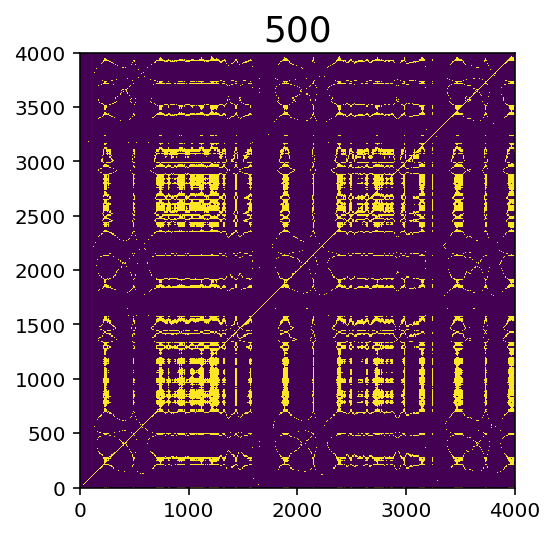

0
1000
2000
3000


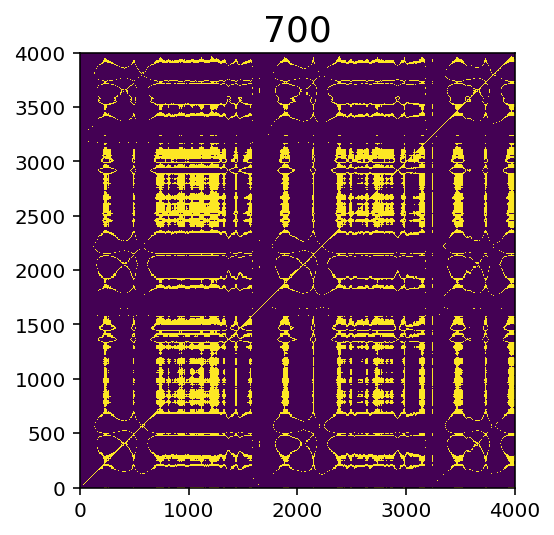

0
1000
2000
3000


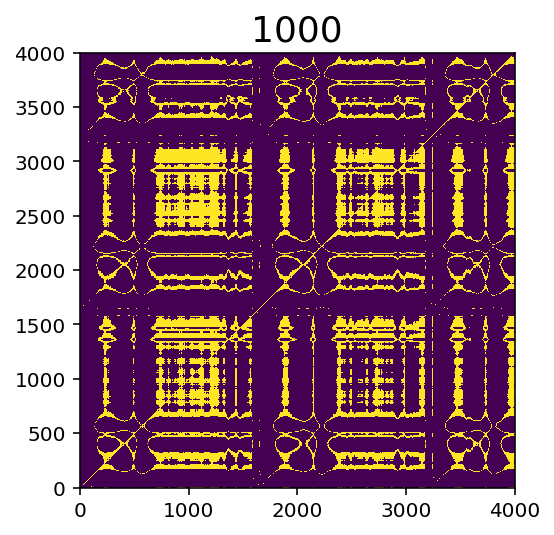

In [115]:
#Diagrama de recurrencia
time_delays = [delay, 125, 250] #time delay de 2 equivale a 12.4 ms
time = time_delays[0]*0.1
n = len(surrogate)

epsilons = [100, 300, 500, 700, 1000]
for epsilon in epsilons:
    
    bin_mat = np.zeros((n,n), dtype = 'bool')

    for i in range(0, n-time_delays[0]):
        for j in range(time_delays[0], n):
            if np.sqrt(surrogate[i]**2 - surrogate[j]**2) < epsilon:
                #euclidian norm less than epsilon
                bin_mat[i][j] = True
        if i%1000 == 0:
            print(i)
    plt.title(epsilon)
    plt.imshow(bin_mat, origin='lower')
    plt.show()

# Recurrence plot with heat map

At the beginning we mentioned an $\epsilon$-neighborhood around a certain point and values of 1 or 0 depending if the other points were inside or not this neighborhood. Instead of these binary values, what if we normalize the distance by the biggest distance possible between two points? In this manner, we will obtain a recurrence plot with colors of a heatmap, depending if the points are near or far away.

In [12]:
# Heat map Recurrence plot
delay = 25
n = len(surrogate)
euclid = np.zeros((n,n), dtype = 'float')
normal_euclid = np.zeros((n,n), dtype = 'float')


for i in range(0, n-delay):
    for j in range(delay, n):
        euclid[i][j] = np.sqrt(np.abs(surrogate[i]**2 - surrogate[j]**2)) #euclidian norm

normal_aux = np.max(euclid)
                         
for i in range(0, n-delay):
    for j in range(delay, n):
        normal_euclid[i][j] = np.abs(euclid[i][j]/normal_aux-1)
        #Normalizing the values, and the farthest points have the lowest value (0),
        #while the nearest points have a value near 1


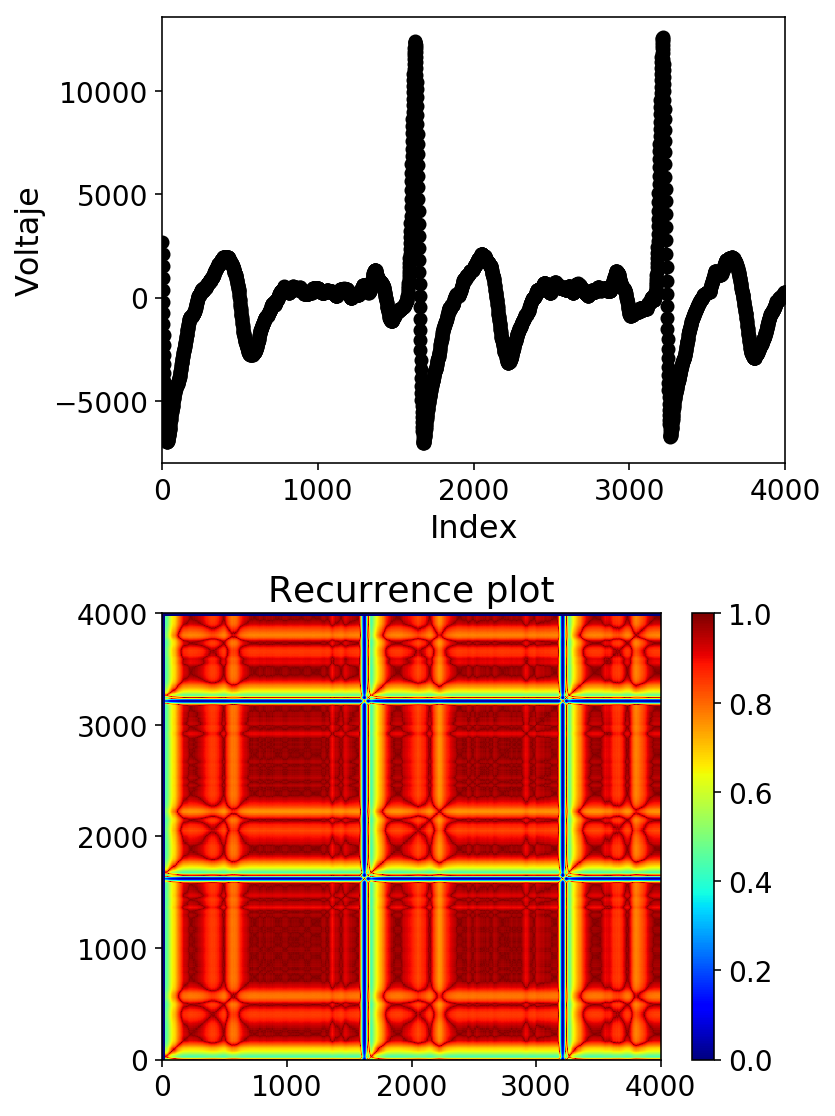

In [28]:
#Initializing the graphic space
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# Electrocardiogram
ax1.set_ylabel('Voltaje')
ax1.set_xlabel('Index')
ax1.set_xlim(0, len(surrogate))
ax1.plot(index_surrogate, surrogate, marker="o", c="k") #index_surrogate or time_surrogate (ms)
# ax1.plot(surrogate[0: n-delay], surrogate[delay: n],
#           marker = "o", markersize = 0.05, linewidth = 0.005, color = "black")

#Diagrama de recurrencia
ax2.set_title("Recurrence plot")
plot = ax2.imshow(normal_euclid, origin='lower', aspect="auto", cmap="jet")
fig.colorbar(plot)
fig.tight_layout()
fig.show()